# Cereal Data

In this project, I will look at data on the nutritional content of breakfast cereals (source: https://www.kaggle.com/crawford/80-cereals) to see how different nutritional variables affect an overall nutritional rating. In this notebook, I will view the data and prepare it for modeling. 

I will imagine that I work for a manufacturer of breakfast cereals, whose goal is to introduce new cereals which receive high nutritional ratings for health conscious consumers.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Import data
data = pd.read_csv('cereal.csv')

The data consists of cereal names, nutritional content, and an overall nutritional rating for each.

In [3]:
# 'mfr' is the cereal manufacturer, with:
# A = American Home Food Products
# G = General Mills
# K = Kelloggs
# N = Nabisco
# P = Post
# Q = Quaker Oats
# R = Ralston Purina

# 'type' is type, with
# C = cold
# H = hot

# View first five rows of data
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# Size of data
data.shape

(77, 16)

## Data Preprocessing

There are a few categorical variables which will be encoded below. There is a value of -1 for 'potass' in the 'Almond Delight' row, so I will look for other negative values, which are invalid values here.

In [5]:
# Print unique values from the 'potass' column
print("Unique values in 'potass' column:", data['potass'].unique())

Unique values in 'potass' column: [280 135 320 330  -1  70  30 100 125 190  35 105  45  55  25  20  65 160
 120  80 200  40  85  90  60  95 170 130 260  15  50 110 240 140 230 115]


In [6]:
# Check for values of -1 in whole dataset
data[data.eq(-1).any(1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


I will drop the row with two missing values.

In [7]:
# Drop the rows containing multiple instances of -1
data_dropped = data.drop(data.index[[57]])

I will use Simple Imputer to fill in the other two missing values.

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = -1, strategy ='median')
imputer = imputer.fit(data_dropped[['potass']])
data_dropped['potass'] = imputer.transform(data_dropped[['potass']]).round(decimals=1).ravel()

In [9]:
# View the first five rows to verify that index 4 has a value for potass now
data_dropped.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,90.0,25,3,1.0,0.75,34.384843


In [10]:
# Set target as y, rest of data as X
y = data_dropped.rating
X = data_dropped.drop(['rating'], axis=1)

In [11]:
# View first five rows of X
X.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.0,25,3,1.0,0.33
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.0,0,3,1.0,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.0,25,3,1.0,0.33
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.0,25,3,1.0,0.50
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,90.0,25,3,1.0,0.75


In [12]:
# View first five rows of y
y.head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
4    34.384843
Name: rating, dtype: float64

In [13]:
# Split data into training and test sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=2)

### Categorical Variables

Before encoding the categorical variables, I need to see which variables they are, and how many entries appear in each.

In [14]:
# Get list of categorical variables
c = (X_train_full.dtypes == 'object')
cat_columns = list(c[c].index)

print("Categorical variables:")
print(cat_columns)

Categorical variables:
['name', 'mfr', 'type']


In [15]:
# Get number of unique entries in each column which contains categorical data
cat_nunique = list(map(lambda col: X_train_full[col].nunique(), cat_columns))

# Define dictionary of categorical data
d = dict(zip(cat_columns, cat_nunique))

# Print number of unique entries in each categorical column, starting with lowest values
sorted(d.items(), key=lambda x: x[1])

[('type', 2), ('mfr', 7), ('name', 57)]

In [16]:
X_train_full.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65.0,25,2,1.0,1.00
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15.0,0,3,0.5,1.00
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105.0,25,1,1.0,1.25
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.0,25,3,1.0,0.33
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50.0,0,3,0.5,1.00


I want to include 'type' and 'mfr', but not 'name', as there are so many entries, and as it is the cereal name, it won't be helpful in our analysis.

In [17]:
# Select categorical columns with a threshold number of categories, in this case 10, so 'type' and 'mfr'
# will be included but 'name' will not be
low_nunique_cat_cols = [colname for colname in X_train_full.columns if X_train_full[colname].nunique() < 10 and 
                        X_train_full[colname].dtype == "object"]

# Apply one-hot encoder to each column with categorical data
# handle_unknown='ignore' ignores unknown variables in test data
# sparse=False returns numpy array rather than sparse matrix
One_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
One_hot_train_cols = pd.DataFrame(One_hot_encoder.fit_transform(X_train_full[low_nunique_cat_cols]))
One_hot_test_cols = pd.DataFrame(One_hot_encoder.transform(X_test_full[low_nunique_cat_cols]))

# Add index back, which was removed during the encoding
One_hot_train_cols.index = X_train_full.index
One_hot_test_cols.index = X_test_full.index

# Drop the original categorical columns, so that what is left is numerical columns only
num_X_train = X_train_full.drop(cat_columns, axis=1)
num_X_test = X_test_full.drop(cat_columns, axis=1)

# Add one-hot encoded categorical columns to numerical columns
X_train_OHE = pd.concat([num_X_train, One_hot_train_cols], axis=1)
X_test_OHE = pd.concat([num_X_test, One_hot_test_cols], axis=1)

In [18]:
# View first five rows of one-hot encoded train data
X_train_OHE.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,0,1,2,3,4,5,6,7,8
18,110,1,1,180,0.0,12.0,13,65.0,25,2,...,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54,50,1,0,0,0.0,13.0,0,15.0,0,3,...,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11,110,6,2,290,2.0,17.0,1,105.0,25,1,...,1.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0,70,4,1,130,10.0,5.0,6,280.0,25,3,...,0.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
55,50,2,0,0,1.0,10.0,0,50.0,0,3,...,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
# Give meaningful names to the one-hot encoded columns
X_train = X_train_OHE.rename(columns={0: 'mfr A', 1: 'mfr G', 2: 'mfr K', 3: 'mfr N', 4: 'mfr P', 5: 'mfr Q', 6: 'mfr R', 7: 'cold', 8: 'hot'})

# Drop 'mfr R' and 'hot' as these are unnecessary 
X_train.drop(['mfr R','hot'], axis=1, inplace=True)
X_train.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,mfr A,mfr G,mfr K,mfr N,mfr P,mfr Q,cold
18,110,1,1,180,0.0,12.0,13,65.0,25,2,1.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0
54,50,1,0,0,0.0,13.0,0,15.0,0,3,0.5,1.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0
11,110,6,2,290,2.0,17.0,1,105.0,25,1,1.0,1.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0,70,4,1,130,10.0,5.0,6,280.0,25,3,1.0,0.33,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55,50,2,0,0,1.0,10.0,0,50.0,0,3,0.5,1.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [20]:
# View first five rows of one-hot encoded test data
X_test_OHE.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,0,1,2,3,4,5,6,7,8
71,100,3,1,200,3.0,16.0,3,110.0,100,3,...,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63,80,2,0,0,3.0,16.0,0,95.0,0,1,...,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76,110,2,1,200,1.0,16.0,8,60.0,25,1,...,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,120,3,5,15,2.0,8.0,8,135.0,0,3,...,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
30,100,2,0,45,0.0,11.0,15,40.0,25,1,...,0.88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
# Give meaningful names to the one-hot encoded columns
X_test = X_test_OHE.rename(columns={0: 'mfr A', 1: 'mfr G', 2: 'mfr K', 3: 'mfr N', 4: 'mfr P', 5: 'mfr Q', 6: 'mfr R', 7: 'cold', 8: 'hot'})

# Drop 'mfr R' and 'hot' as these are unnecessary
X_test.drop(['mfr R','hot'], axis=1, inplace=True)
X_test.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,mfr A,mfr G,mfr K,mfr N,mfr P,mfr Q,cold
71,100,3,1,200,3.0,16.0,3,110.0,100,3,1.00,1.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0
63,80,2,0,0,3.0,16.0,0,95.0,0,1,0.83,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0
76,110,2,1,200,1.0,16.0,8,60.0,25,1,1.00,0.75,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,120,3,5,15,2.0,8.0,8,135.0,0,3,1.00,1.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0
30,100,2,0,45,0.0,11.0,15,40.0,25,1,1.00,0.88,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Identify Important Variables

Doing scatter plots with regression lines can be helpful for seeing the correlation between variables
and the rating.


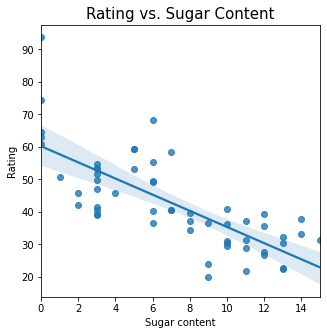

In [22]:
# Scatter plot with regression line for sugar

# Set the width and height of the figure
plt.figure(figsize=(5,5))

# Regression line
sns.regplot(x=X_train['sugars'], y=y_train)

# Add title
plt.title("Rating vs. Sugar Content", size=15)

# Add label for horizontal axis
plt.xlabel("Sugar content", size=10)

# Add label for vertical axis
plt.ylabel("Rating", size=10);

As might be expected, the sugar content is correlated with the overall rating.

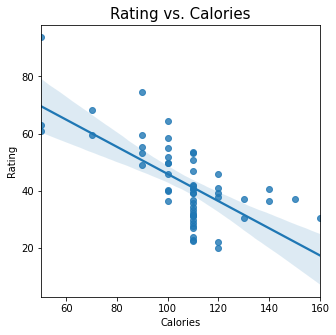

In [23]:
# Scatter plot with regression line for calories

# Set the width and height of the figure
plt.figure(figsize=(5,5))

# Regression line
sns.regplot(x=X_train['calories'], y=y_train)

# Add title
plt.title("Rating vs. Calories", size=15)

# Add label for horizontal axis
plt.xlabel("Calories", size=10)

# Add label for vertical axis
plt.ylabel("Rating", size=10);

The calories are also strongly correlated to the rating.

Let's check to see if 'shelf' is correlated with the nutritional rating. Stores may organize cereals in a way which correlates with nutritional content.

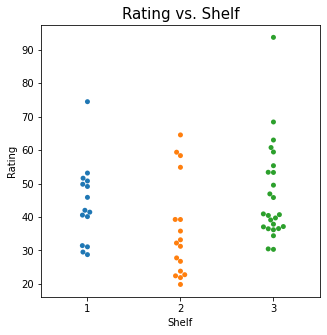

In [24]:
# Categorical scatter plot for shelf

# Set the width and height of the figure
plt.figure(figsize=(5,5))

# Categorical scatter plot
sns.swarmplot(x=X_train['shelf'], y=y_train)

# Add title
plt.title("Rating vs. Shelf", size=15)

# Add label for horizontal axis
plt.xlabel("Shelf", size=10)

# Add label for vertical axis
plt.ylabel("Rating", size=10);

There is a slight correlation. 

There is an outlier point with a very high rating which I will remove.

In [25]:
# Remove the outlier point with a very high rating

X_train_drop_outlier = X_train.drop(data.index[3])
y_train_drop_outlier = y_train.drop(data.index[3])

To quantify the correlation of each numerical variable with rating, I will use a correlation matrix.

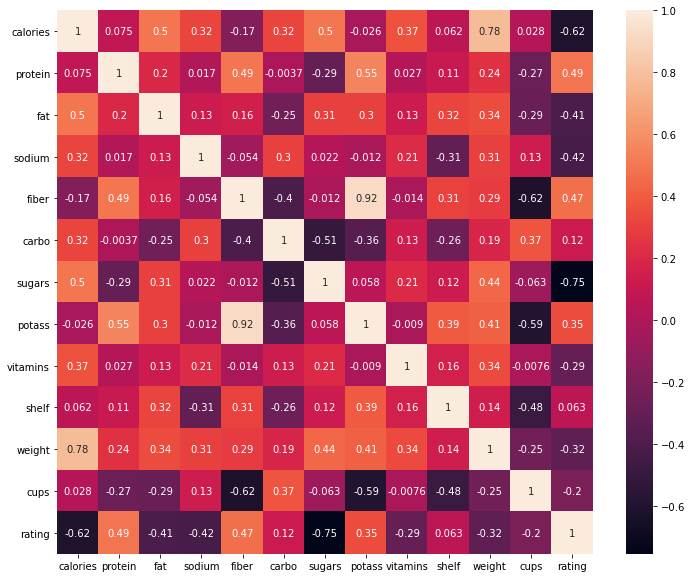

In [26]:
# Define data for correlation matrix
train_data = X_train_drop_outlier.join(y_train_drop_outlier)
correlation_matrix_data_num = train_data.drop(['mfr A','mfr G','mfr K','mfr N','mfr P','mfr Q','cold'], axis=1).corr()

# Plot of correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_data_num, annot=True)
plt.show()

Viewing the correlations as a bar chart is a little easier to interpret.

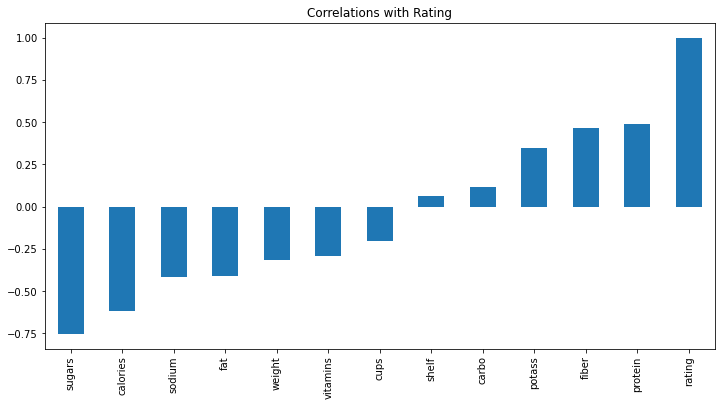

In [27]:
# Bar chart showing correlations with rating
plot_data = correlation_matrix_data_num["rating"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with Rating")
plt.show();

There is significant correlation between most of the variables and the rating. I will include all variables with a correlation with an absolute value greater than 0.15. The correlation between rating and carbo is 0.12, andthe correlation between rating and shelf is 0.063, so I will drop 'carbo' and 'shelf'.

In [28]:
# Drop 'carbo' and 'shelf' columns
X_train_drop_columns = X_train_drop_outlier.drop(['carbo','shelf'], axis=1)
X_test_drop_columns = X_test.drop(['carbo','shelf'], axis=1)

Now I will create a correlation matrix for the categorical features.

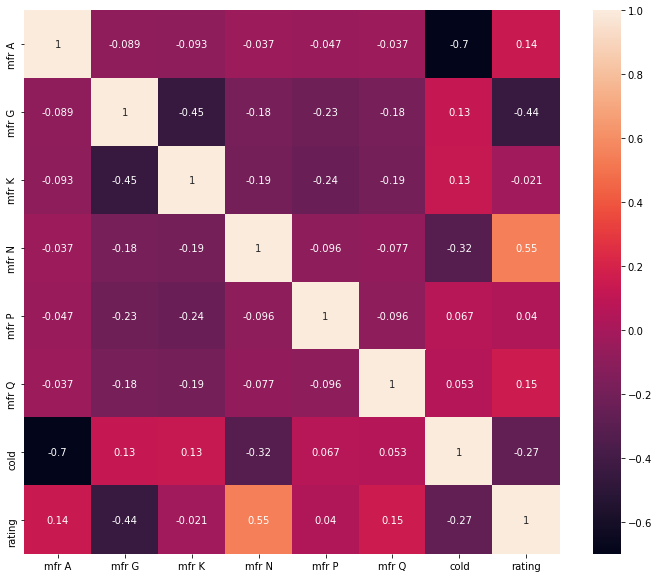

In [29]:
# Define data for correlation matrix
correlation_matrix_data_cat = train_data.drop(['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups'], axis=1).corr()

# Plot of correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_data_cat, annot=True)
plt.show();

Some of the mfr features have correlations greater than 0.1, as does 'cold'. I will check the correlations between 'mfr G', 'mfr N', 'cold' and the numerical features.

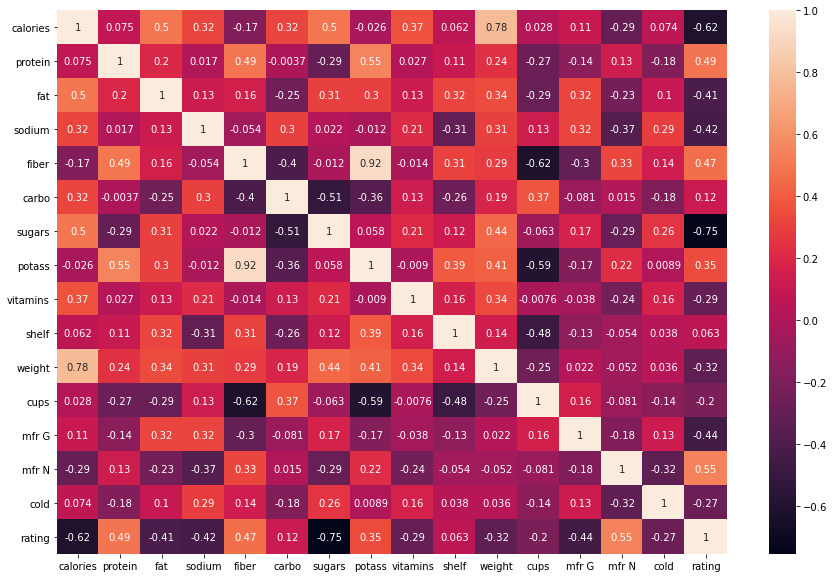

In [30]:
# Define data for correlation matrix
correlation_matrix_data = train_data.drop(['mfr A','mfr K','mfr P','mfr Q'], axis=1).corr()

# Plot of correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix_data, annot=True)
plt.show();

Since 'mfr G' and 'mfr N' correlate with the numerical data (with at least one correlation greater than 0.3), I will drop these. I will keep 'cold' just to see how it is used by the models, and because its highest correlation is only 0.29.

In [31]:
# Drop mfr columns
X_train_to_export = X_train_drop_columns.drop(['mfr A','mfr G','mfr K','mfr N','mfr P','mfr Q'], axis=1)
X_test_to_export = X_test_drop_columns.drop(['mfr A','mfr G','mfr K','mfr N','mfr P','mfr Q'], axis=1)

In [32]:
# Rename 'potass' to 'potassium' for easier interpretation
X_train_to_export_final = X_train_to_export.rename(columns={'potass': 'potassium'})
X_test_to_export_final = X_test_to_export.rename(columns={'potass': 'potassium'})

### Export Prepared Train and Test Data

In [33]:
# Export train data
X_train_to_export_final.to_csv('X_train.csv', index=False)
y_train_drop_outlier.to_csv('y_train.csv', index=False)

# Export test data
X_test_to_export_final.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Now with the data exported, it can be read into the Models notebook where I will try out different models.